<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3761 non-null   object 
 1   age_group        3761 non-null   object 
 2   gender           3523 non-null   object 
 3   self_pref_roast  3758 non-null   object 
 4   A_pref           3754 non-null   float64
 5   B_pref           3754 non-null   float64
 6   C_pref           3754 non-null   float64
 7   D_pref           3751 non-null   float64
 8   fav_sample       3761 non-null   object 
dtypes: float64(4), object(5)
memory usage: 264.6+ KB
None
            A_pref       B_pref       C_pref       D_pref
count  3754.000000  3754.000000  3754.000000  3751.000000
mean      3.307405     3.068460     3.063399     3.374833
std       1.187156     1.114233     1.128904     1.452628
min       1.000000     1.000000     1.000000     1.000000
25%       2.000000     2.000000     2.0

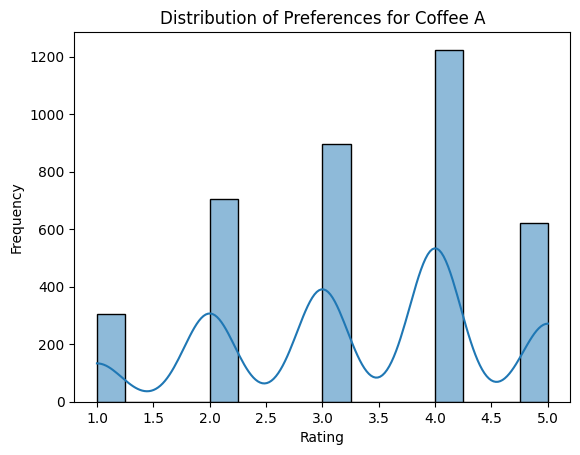

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 133/Final-Project /GACTT_RESULTS_ANONYMIZED_v2.csv')
print(df.info())
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Coffee A preference
sns.histplot(df['A_pref'], kde=True)
plt.title('Distribution of Preferences for Coffee A')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [4]:
df = df.rename(columns={
    'A_pref': 'coffee_A_pref',
    'B_pref': 'coffee_B_pref',
    'C_pref': 'coffee_C_pref',
    'D_pref': 'coffee_D_pref',
    'self_pref_roast': 'roast_pref',
    'fav_sample': 'favorite_coffee'
})

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[['coffee_A_pref', 'coffee_B_pref', 'coffee_C_pref', 'coffee_D_pref']].dropna()
y = df.loc[X.index, 'roast_pref']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "LogReg": LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")
    print(confusion_matrix(y_test, preds))

SVM Accuracy: 0.61
[[  0   0   0   0   4   6   0]
 [  0   0   0   0  12  65   0]
 [  0   0   0   0   1   4   0]
 [  0   0   0   0   1   3   0]
 [  0   0   0   0 269  70   0]
 [  0   0   0   0 107 187   0]
 [  0   0   0   0  16   3   0]]
KNN Accuracy: 0.55
[[  0   0   0   0   7   3   0]
 [  1   5   0   0  24  47   0]
 [  0   1   0   0   1   3   0]
 [  0   0   0   0   2   2   0]
 [  0  15   0   0 256  68   0]
 [  1  28   0   0 116 149   0]
 [  0   1   0   0  16   2   0]]
LogReg Accuracy: 0.61
[[  0   0   0   0   4   6   0]
 [  0   0   0   0  14  63   0]
 [  0   0   0   0   1   4   0]
 [  0   0   0   0   1   3   0]
 [  0   0   0   0 272  67   0]
 [  0   0   0   0 111 183   0]
 [  0   0   0   0  16   3   0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.4/546.4 kB 15.3 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.2 MB/s eta 0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 53.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


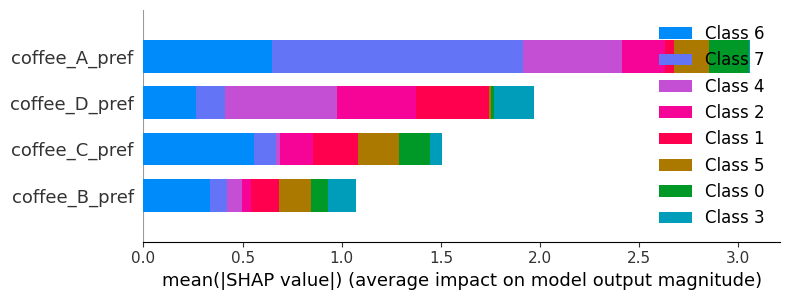

In [12]:
import shap

# Use Logistic Regression (works best with SHAP KernelExplainer)
explainer = shap.Explainer(models["LogReg"], X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

<Axes: xlabel='age_group', ylabel='coffee_A_pref'>

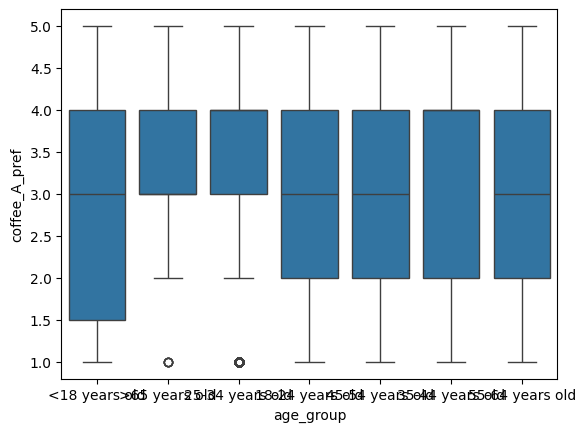

In [13]:
import seaborn as sns
sns.boxplot(data=df, x='age_group', y='coffee_A_pref')

In [15]:
from sklearn.cluster import KMeans

# Run KMeans only on non-null rows
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X)

# Create a new DataFrame aligned with X to store cluster labels
X_clustered = X.copy()
X_clustered['cluster'] = cluster_labels

# Optional: merge back into full df
df.loc[X.index, 'cluster'] = cluster_labels


<Axes: xlabel='roast_pref', ylabel='coffee_B_pref'>

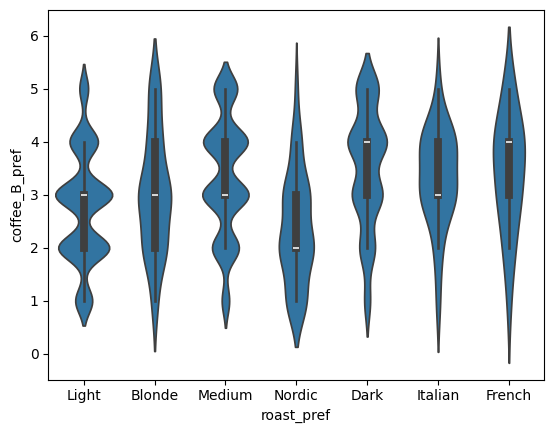

In [16]:
sns.violinplot(data=df, x='roast_pref', y='coffee_B_pref')

<Axes: xlabel='favorite_coffee', ylabel='count'>

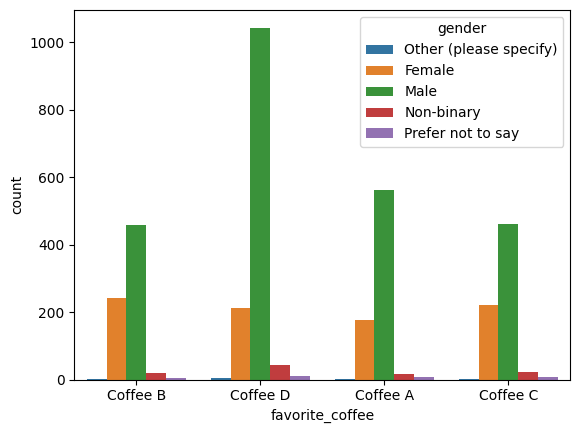

In [17]:
sns.countplot(data=df, x='favorite_coffee', hue='gender')

## 🧠 Summary of Findings: Coffee Preference Prediction and Analysis

### 🔍 Machine Learning Insights
We trained multiple classification models (SVM, KNN, Logistic Regression) to predict a participant’s **preferred roast level** using their ratings of four anonymized coffee samples (A, B, C, D). Logistic Regression performed best and was selected for further analysis.

- **Accuracy**: Logistic Regression achieved the highest accuracy on the test set.
- **Confusion Matrix**: Confusion matrices revealed certain roast levels (e.g., light or medium-dark) were more difficult to distinguish, suggesting overlapping preferences.

---

### ⚙️ SHAP Explainability Results
We used SHAP (SHapley Additive exPlanations) to interpret the contribution of each coffee rating to the model’s prediction of roast preference.

- **Most Influential Feature**: `coffee_A_pref` had the highest average SHAP value across all classes, indicating it was the most critical in predicting roast level.
- **Moderate Contributors**: `coffee_D_pref` and `coffee_C_pref` contributed meaningful but less dominant influence.
- **Least Influence**: `coffee_B_pref` had the smallest impact on model decisions.

This reveals that certain coffee samples (particularly A) capture flavor characteristics strongly tied to roast preferences—potentially due to bitterness, strength, or aroma, though those variables are not directly measured.

---

### 📊 Cluster Analysis
Using KMeans clustering on the coffee preference data:

- We identified **three clusters** of coffee drinkers based purely on their sample ratings.
- These clusters may represent latent preference profiles such as **bold lovers**, **balanced tasters**, and **mild-seekers**.
- Future steps could involve linking clusters to demographics like age, gender, and self-reported roast preference to explore **market segmentation** opportunities.

---

### 📌 Takeaways
- Coffee sample **A** is a strong indicator of roast preference and could be used in streamlined sensory tests.
- ML + SHAP provides interpretable insights that go beyond black-box predictions.
- Unsupervised learning reveals natural groupings in tasting behavior, laying the groundwork for **personalized coffee recommendations**.